This is my Video Game EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Video_Games.csv')

In [3]:
df.shape

(16719, 16)

In [57]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [10]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [11]:
percent_missing = df.isnull().sum() / len(df)
percent_missing

Name               0.000120
Platform           0.000000
Year_of_Release    0.016089
Genre              0.000120
Publisher          0.003230
NA_Sales           0.000000
EU_Sales           0.000000
JP_Sales           0.000000
Other_Sales        0.000000
Global_Sales       0.000000
Critic_Score       0.513308
Critic_Count       0.513308
User_Score         0.400981
User_Count         0.546025
Developer          0.396136
Rating             0.404869
dtype: float64

In [15]:
# Check for Duplicates
df.duplicated().sum()

0

In [28]:
# Checking the unique values for Genre
platform = df['Genre'].unique()
platform

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [12]:
# FIND THE PERCENTAGES OF EACH REGION VS THE TOTAL

# Repeat this for each region
na_max = df['NA_Sales'].max()
na_mean = df['NA_Sales'].mean()
print(na_max)
print(na_mean)

41.36
0.26333034272384714


In [29]:
eu_max = df['EU_Sales'].max()
eu_mean = df['EU_Sales'].mean()
print(eu_max)
print(eu_mean)

28.96
0.14502482205873557


In [28]:
jp_max = df['JP_Sales'].max()
jp_mean = df['JP_Sales'].mean()
print(jp_max)
print(jp_mean)

10.22
0.07760212931395419


In [29]:
other_max = df['Other_Sales'].max()
other_mean = df['Other_Sales'].mean()
print(other_max)
print(other_mean)

10.57
0.04733177821640051


In [12]:
# Total Sales by Region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum()
region_sales

NA_Sales       4402.62
EU_Sales       2424.67
JP_Sales       1297.43
Other_Sales     791.34
dtype: float64

In [56]:
# CREATE A SUBSET OF MULTIPLE COLUMNS AND AGGREGATE

# Group by 'Platform' and 'Region' and calculate the sum of sales
platform_sales = df.groupby(['Platform'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].max()

# Reset index to make 'Platform' and 'Region' as regular columns
platform_sales_reset = platform_sales.reset_index()

# Sort by 'Platform' in ascending order
platform_sales_sorted = platform_sales_reset.sort_values(by='NA_Sales',ascending=False)

print(platform_sales_sorted.head(10))

   Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
26      Wii     41.36     28.96      4.70         8.45
11      NES     29.08      3.58      6.81         1.51
5        GB     23.20      8.89     10.22         1.00
28     X360     15.00      5.14      0.24         1.69
23     SNES     12.78      3.75      3.81         0.55
4        DS     11.28     10.95      6.50         2.88
16      PS2      9.43      5.49      3.61        10.57
0      2600      7.28      0.45      0.00         0.08
17      PS3      7.02      9.09      1.87         3.96
10      N64      6.91      2.85      2.23         0.23


In [6]:
# Groupby 'Genre' (groups by unique name), Calculates size of each group, 
# resets the index and renames the column containing the size of each genre in the original df

name_by_genre = df.groupby('Genre').size().reset_index(name='Count')
name_by_genre

,Genre,Count
0,Action,3370
1,Adventure,1303
2,Fighting,849
3,Misc,1750
4,Platform,888
5,Puzzle,580
6,Racing,1249
7,Role-Playing,1500
8,Shooter,1323
9,Simulation,874


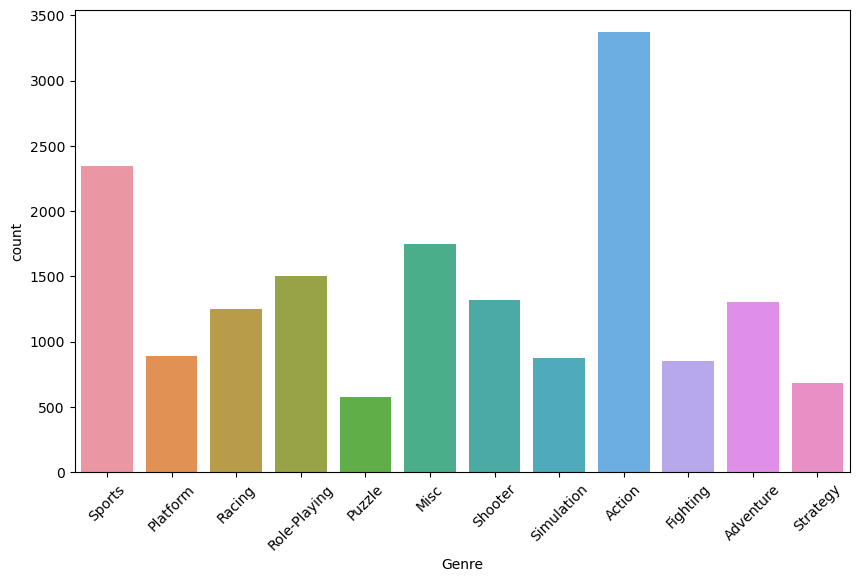

In [7]:
#This is not correct as the labels are not in alpha order
# Count Values in Each Genre
plt.figure(figsize = (10,6))
plt.xticks(rotation=45)
sns.countplot(x='Genre', data=df)
plt.show()

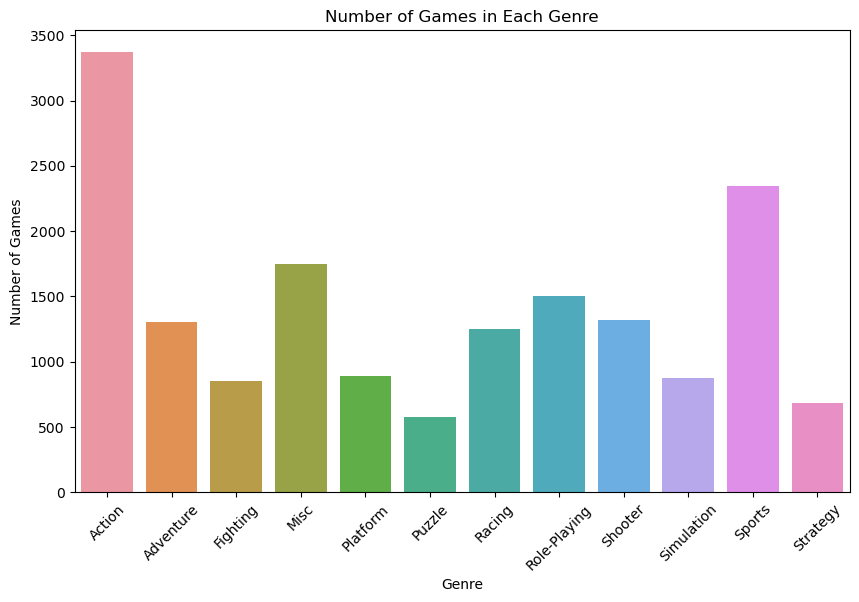

In [8]:
# THIS IS CORRECT

# Group the DataFrame by 'Genre' and count occurrences
genre_counts = df.groupby('Genre').size()

# Create a bar plot to show count of games in each genre
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Number of Games in Each Genre')
plt.show()

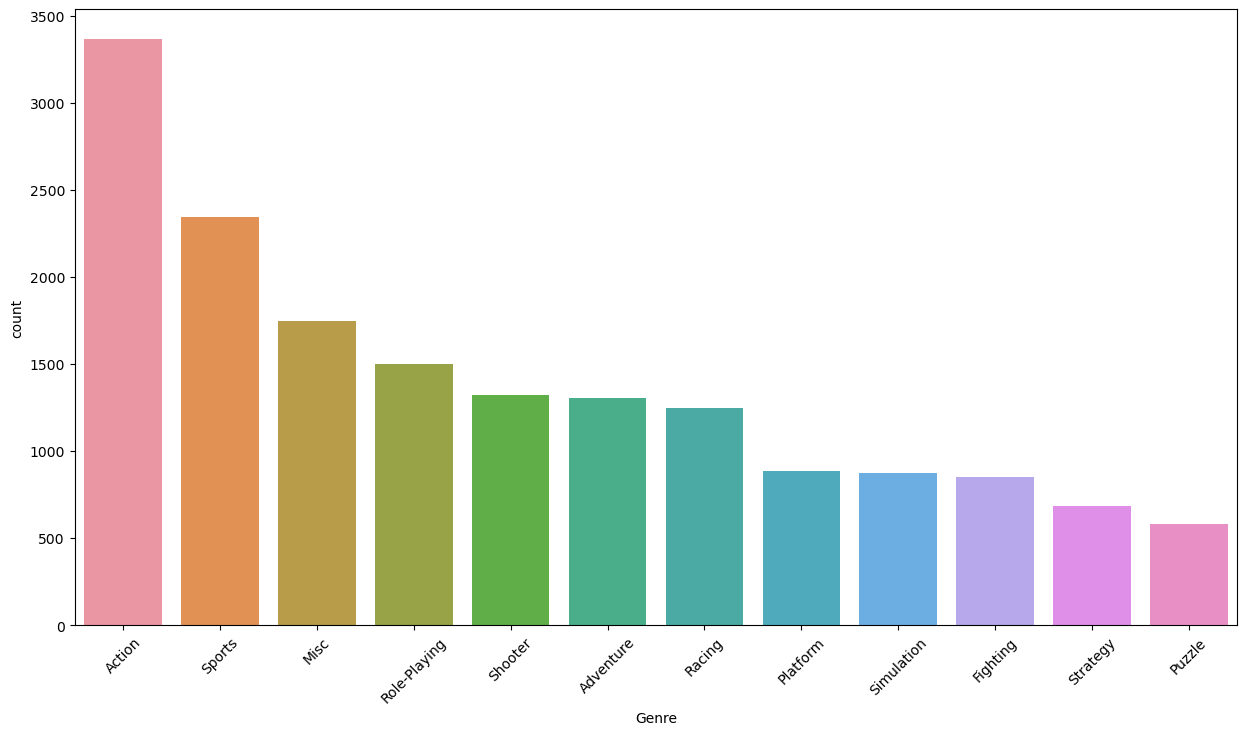

In [16]:
# SORTING VALUE COUNTS IN DESCENDING

# Calculate the count of games in each genre
genre_counts = df['Genre'].value_counts().reset_index()

genre_counts.columns = ['Genre','Count']
genre_counts = genre_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)
sns.countplot(x='Genre', data=df, order=genre_counts['Genre'])
plt.show()

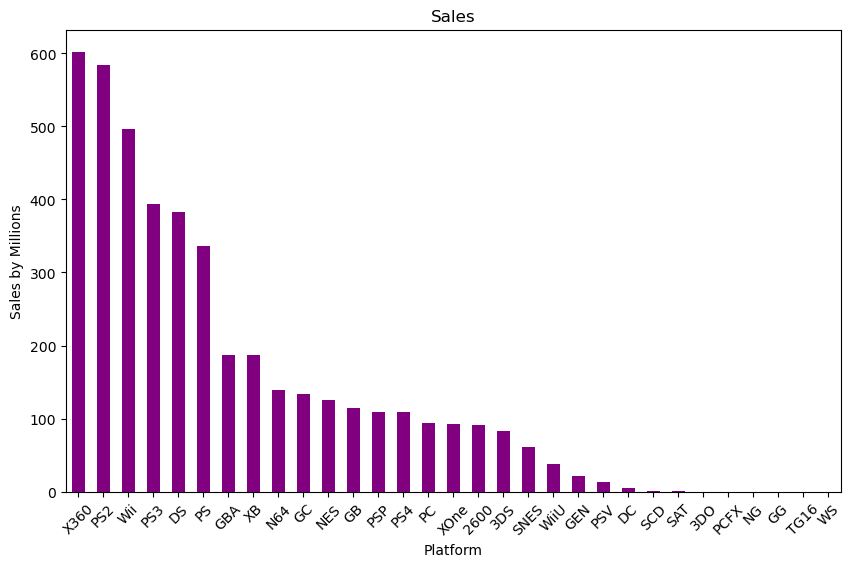

In [9]:
# Assuming you have a DataFrame df containing platform sales data
platform_sales = df.groupby('Platform')['NA_Sales'].sum()  # Group and sum sales by platform
platform_sales = platform_sales.sort_values(ascending=False)  # Sort the values in descending order

# Plotting the data
plt.figure(figsize=(10, 6))
platform_sales.plot(kind='bar', color='purple')
plt.xticks(rotation=45)
plt.title('Sales')
plt.ylabel('Sales by Millions')
plt.show()


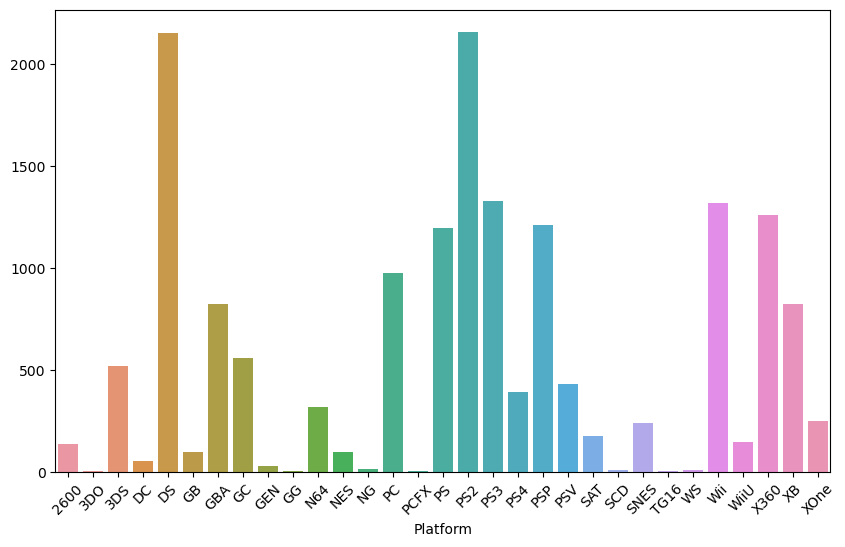

In [95]:
# Group the df by Platform
platform_counts = df.groupby('Platform').size()
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.xlabel = ('Platform')
plt.ylabel = ('Number of Platforms')
plt.title = ('Number of Games on Each Platform')

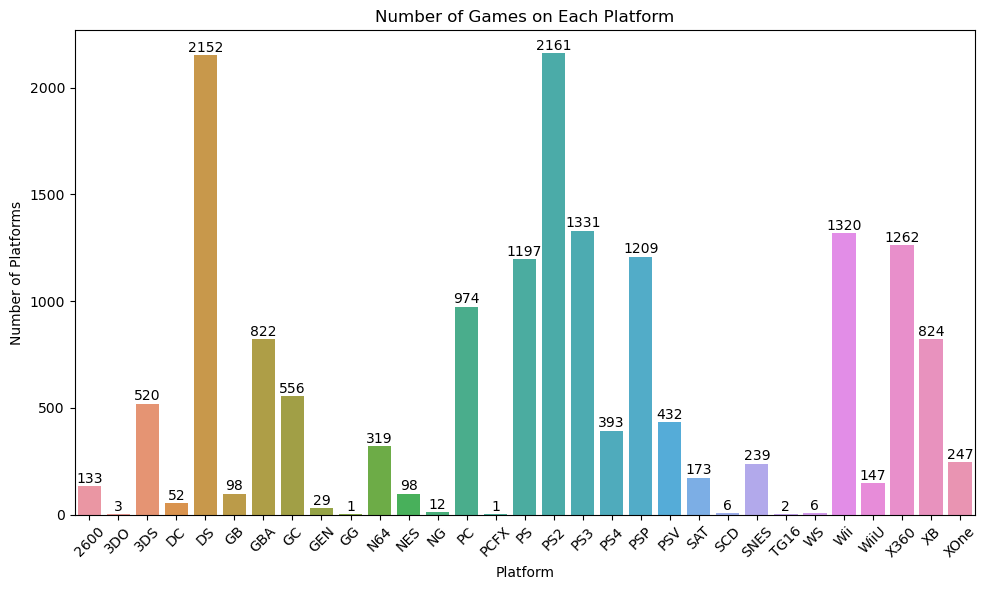

In [15]:
# SHOW VALUES AT THE TOP OF THE BARS


# Group the DataFrame by Platform and calculate size
platform_counts = df.groupby('Platform').size()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values)

# Add value annotations to the top of each bar
for index, value in enumerate(platform_counts.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.xlabel('Platform')
plt.ylabel('Number of Platforms')
plt.title('Number of Games on Each Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# This returns error TypeError: 'str' object is not callable
# Chat says 
#  it's possible that somewhere else in your code, 
#  you've unintentionally assigned a string to a built-in function or attribute, 
#  causing the conflict. Try checking your code for any occurrences of variable names 
#  that match built-in function names.



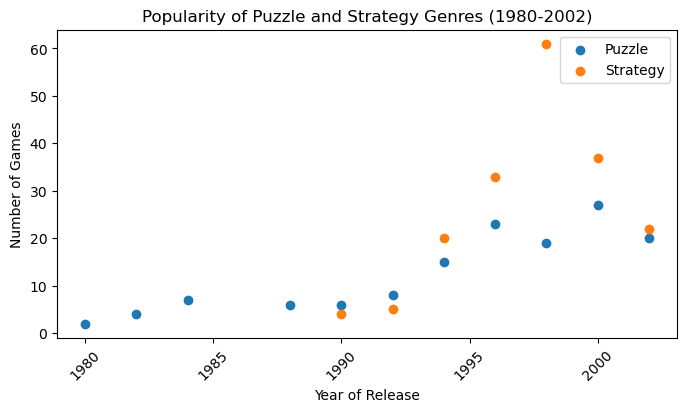

In [13]:
# SCATTER PLOT OF 2 GENRES OVER THE YEARS 1980 AND 2020
# DO THE SAME FOR PLATFORM, AUTHOR, ETC.

# Filter the DataFrame for years 1980 to 2002
filtered_df = df[(df['Year_of_Release'] >= 1980) & (df['Year_of_Release'] <= 2002)]

# Filter the DataFrame for 'Puzzle' and 'Strategy' genres
puzzle_df = filtered_df[filtered_df['Genre'] == 'Puzzle']
strategy_df = filtered_df[filtered_df['Genre'] == 'Strategy']


# Count the occurrences of each genre for each year - Will display every 5 years
#puzzle_counts = puzzle_df.groupby('Year_of_Release').size()
#strategy_counts = strategy_df.groupby('Year_of_Release').size()


# Adjust variables so they will display data every 2 years
puzzle_counts = puzzle_df.groupby((puzzle_df['Year_of_Release'] // 2) * 2).size()
strategy_counts = strategy_df.groupby((strategy_df['Year_of_Release'] // 2) * 2).size()

# Plot the counts on a scatter plot
plt.figure(figsize=(8, 4))
plt.xticks(rotation=45)
plt.scatter(puzzle_counts.index, puzzle_counts.values, label='Puzzle')
plt.scatter(strategy_counts.index, strategy_counts.values, label='Strategy')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.title('Popularity of Puzzle and Strategy Genres (1980-2002)')
plt.legend()
plt.show()


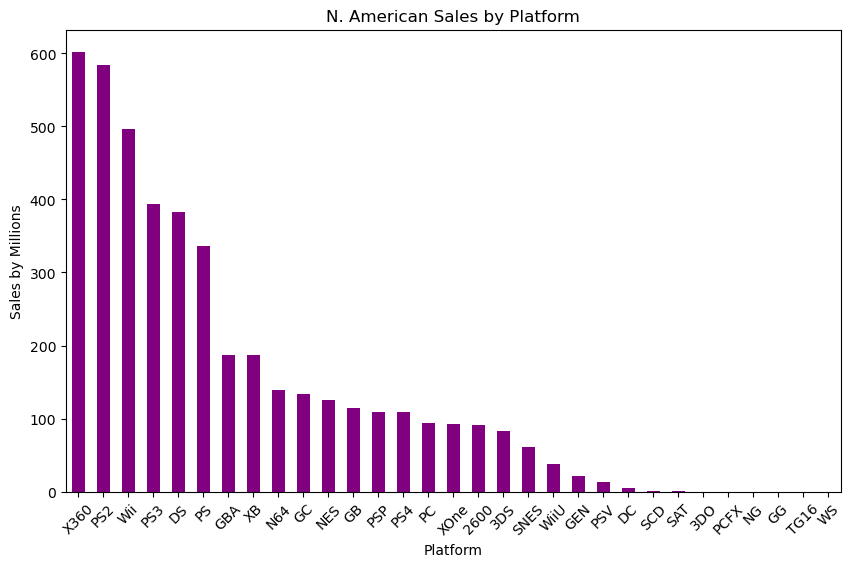

In [18]:
# SHOW ALL NA_SALES GROUPED BY PLATFORM

platform_sales = df.groupby('Platform')['NA_Sales'].sum()  # Group and sum sales by platform
platform_sales = platform_sales.sort_values(ascending=False)  # Sort the values in descending order

# Plotting the data
plt.figure(figsize=(10, 6))
platform_sales.plot(kind='bar', color='purple')
plt.xticks(rotation=45)
plt.title('N. American Sales by Platform')
plt.ylabel('Sales by Millions')
plt.show()


In [26]:
# Find the top 5 Genres for NA_Sales
sales_data_output = df.set_index('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_na_genre = sales_data_output.sort_values(by='NA_Sales', ascending=False).head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Sports,41.36,28.96,3.77,8.45
Platform,29.08,3.58,6.81,0.77
Shooter,26.93,0.63,0.28,0.47
Puzzle,23.20,2.26,4.22,0.58
Racing,15.68,12.76,3.79,3.29


In [27]:
# RESET INDEX FOR CODE ABOVE
sales_data_output = sales_data_output.reset_index()
sales_data_output.head(5)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Sports,41.36,28.96,3.77,8.45
1,Platform,29.08,3.58,6.81,0.77
2,Racing,15.68,12.76,3.79,3.29
3,Sports,15.61,10.93,3.28,2.95
4,Role-Playing,11.27,8.89,10.22,1.00


In [24]:
# SERIES OR DF - .mean() eturns a series bc it aggregates / remove .mean() and a df is returned
sales_data_mean = df.set_index('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
sales_data_mean

NA_Sales       0.263330
EU_Sales       0.145025
JP_Sales       0.077602
Other_Sales    0.047332
dtype: float64

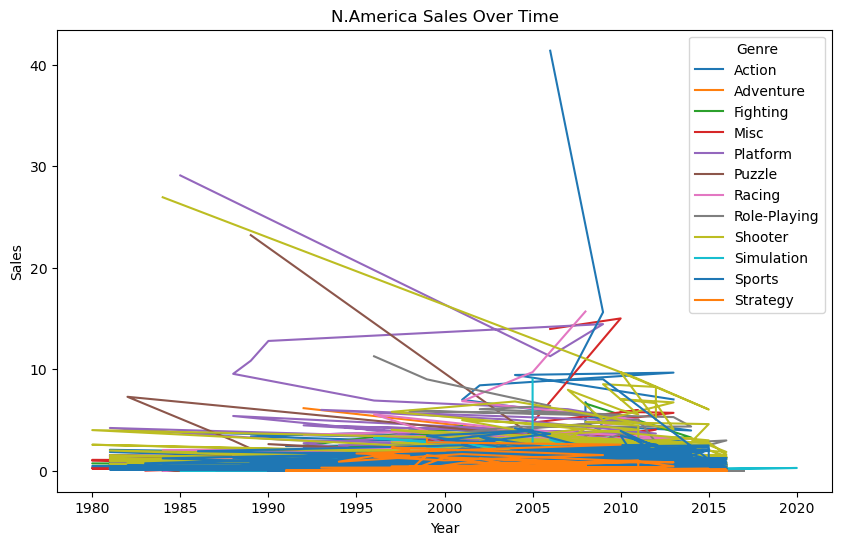

In [13]:
# Create a line plot for each genre
plt.figure(figsize=(10, 6))
for genre, data in df.groupby('Genre'):
    plt.plot(data['Year_of_Release'], data['NA_Sales'], label=genre)

# Set title and labels
plt.title('N.America Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Genre')

# Show the plot
plt.show()

# This does not work!

In [60]:
region_sales = df.set_index('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,
2006.0,41.36,28.96,3.77,8.45
1985.0,29.08,3.58,6.81,0.77
2008.0,15.68,12.76,3.79,3.29
2009.0,15.61,10.93,3.28,2.95
1996.0,11.27,8.89,10.22,1.00
...,...,...,...,...
2016.0,0.00,0.00,0.01,0.00
2006.0,0.00,0.01,0.00,0.00
2016.0,0.00,0.00,0.01,0.00


In [37]:
publisher = df['Publisher'].nunique()
type(publisher)

int

In [40]:
df['Publisher'].duplicated().sum()

16137

In [44]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().nlargest(10)
top_publishers

Publisher
Nintendo                        1788.81
Electronic Arts                 1116.96
Activision                       731.16
Sony Computer Entertainment      606.48
Ubisoft                          471.61
Take-Two Interactive             403.82
THQ                              338.44
Konami Digital Entertainment     282.39
Sega                             270.35
Namco Bandai Games               254.62
Name: Global_Sales, dtype: float64

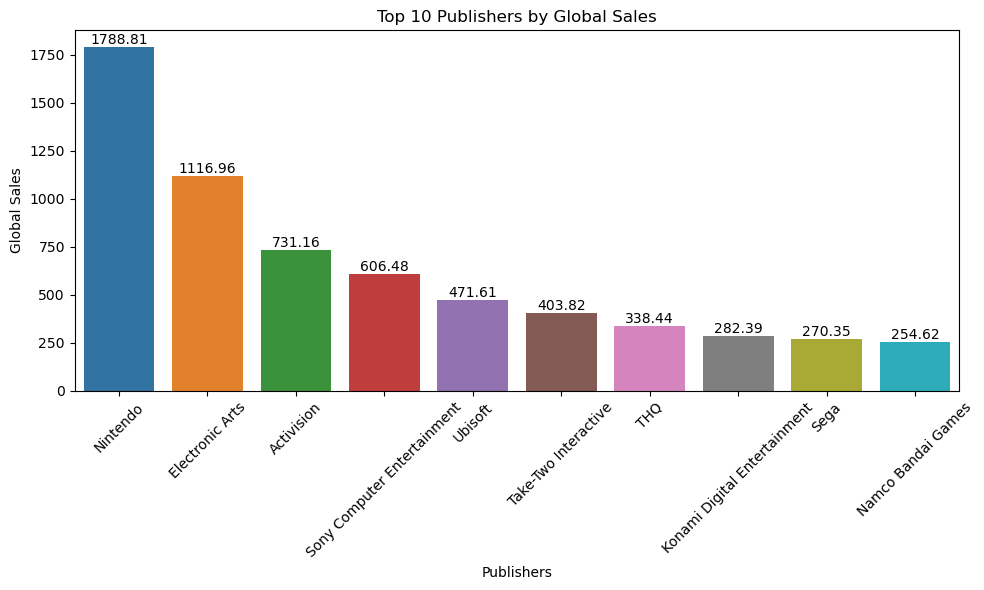

In [46]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)

# Add value annotations to the top of each bar
for index, value in enumerate(top_publishers.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.xlabel('Publishers')
plt.ylabel('Global Sales')
plt.title('Top 10 Publishers by Global Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
top_games = df.groupby('Name')['Global_Sales'].sum().nlargest(10)
top_games

Name
Wii Sports                        82.53
Grand Theft Auto V                56.57
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.52
Wii Sports Resort                 32.77
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Black Ops           30.82
Call of Duty: Modern Warfare 3    30.59
New Super Mario Bros.             29.80
Name: Global_Sales, dtype: float64

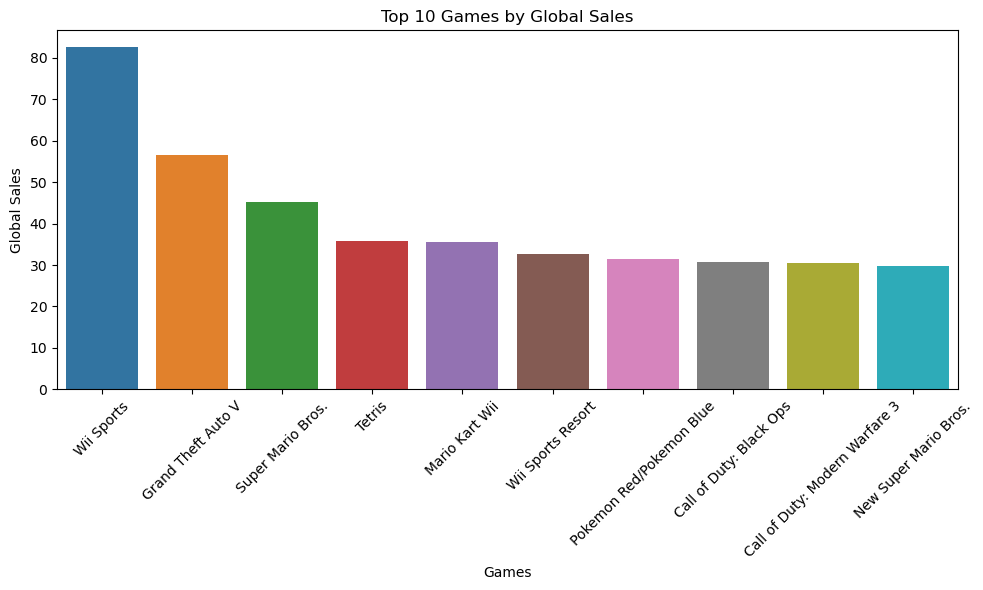

In [54]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_games.index, y=top_games.values)

# Add value annotations to the top of each bar
for index, value in enumerate(top_games.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.xlabel('Games')
plt.ylabel('Global Sales')
plt.title('Top 10 Games by Global Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
